# Descenso de gradiente
## Callejas Hernández Edgar

El descenso del gradiente es un método de optimización para hallar máximos y mínimos de una función $f(X)$. 

El principio de este método se basa en utilizar el gradiente de la función objetivo $\nabla f(X)$ que es un vector que apunta en dirección de máxima pendiente.

$$\nabla f(X) = \begin{bmatrix}
\frac{\partial f(X)}{\partial X_0}\\
\frac{\partial f(X)}{\partial X_1} \\
\vdots \\
\frac{\partial f(X)}{\partial X_{n-1}}
\end{bmatrix}$$

La ecuación iterativa para minimizar o maximizar una función es 
$$X_{i+1} = X_i \pm h \nabla f(X_i)$$

Para calcular el tamaño de $h$ utilizamos la siguiente formula 
$$h = \frac{|(X_n-X_{n-1})^T \cdot (\nabla f(X_n)-\nabla f(X_{n-1}))|}{ || \nabla f(X_n)-\nabla f(X_{n-1})||^2}$$

Para la implementación del método en python definimos las siguientes funciones 

- `grad_F` evalua el gradiente en un punto, requiere `df` lista de funciones, un punto `X`

- `h` la función objetivo requiere de un punto `X`

- `desc_Grad` implemente el descenso de gradiente requiere `f` función objetivo, `df` lista de funciónes (derivadas parciales), `X0` un punto inicial. 

In [1]:
import numpy as np
from numpy.linalg import norm

In [2]:
def grad_F(df,x):
    grad = np.zeros(len(df))
    for i in range(len(df)):
        grad[i] = df[i](x) 
    return grad

In [3]:
def h(x):
    x = np.array(x)
    x = x**2
    return np.sum(x)

dh = []
for i in range(7):
    def dhi(x,index = i):
        return 2*x[index]
    dh.append(dhi)
    
def desc_Grad(f,df,x0):
    x0 = np.array(x0)
    x1 = x0
    h = 0.1
    while(True):
        x0 = x1
        x1 = x0 - h*grad_F(df,x0)
        grad_x1 = grad_F(df,x1)
        grad_x0 = grad_F(df,x0)
        h = abs(np.dot(x1-x0, grad_x1-grad_x0)) / norm( grad_x1-grad_x0 )**2
        critico = norm(grad_x1-grad_x0)**2
        if critico<10e-30:
            break
    return x1

In [5]:
print(desc_Grad(h,dh,(2,2,2,2,2,2,2)))

[0. 0. 0. 0. 0. 0. 0.]


Podemos ver que el máximo para nuestra función se encuentra en el punto $X = (0,0,0,0,0,0,0)$

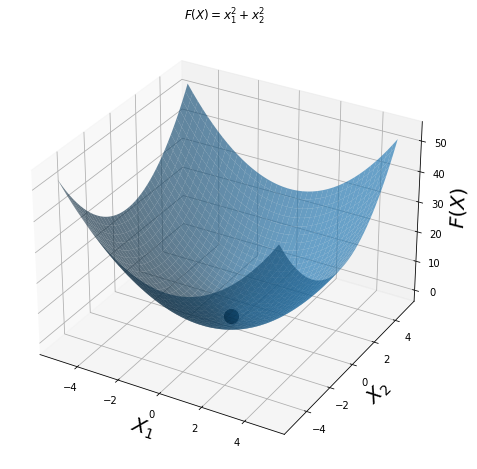

In [28]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x1, x2):
    return x1**2 + x2**2

fig = plt.figure( figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-5.12, 5.12, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha = 0.65)
ax.scatter(0.0,0.0,0.0,marker='o', s=200, c='k')
ax.set_xlabel(r'$X_1$', fontsize=20)
ax.set_ylabel(r'$X_2$', fontsize=20)
ax.set_zlabel(r'$F(X)$', fontsize=20)
ax.set_title(r'$F(X) = x_1^2 + x_2^2$')
plt.show()